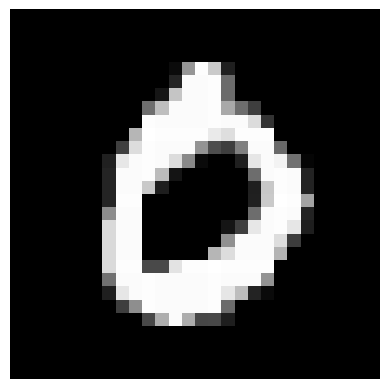

In [1]:
import pandas as pd
from PIL import Image, ImageOps
import numpy as np
import os
import random
import matplotlib.pyplot as plt


csv_file = r"C:\Users\Aaditya\Desktop\ipcv_pracs\data\mnist_test.csv"  # Replace with the provided file name
data = pd.read_csv(csv_file)

labels = data.iloc[:, 0]  # First column: Labels
pixels = data.iloc[:, 1:]  # Remaining columns: Pixel data

# Directory to save images
output_dir = r"C:\Users\Aaditya\Desktop\ipcv_pracs\mnist_images"
os.makedirs(output_dir, exist_ok=True)

for idx, (label, pixel_values) in enumerate(zip(labels, pixels.values)):
    image_array = pixel_values.reshape(28, 28).astype(np.uint8)
    img = Image.fromarray(image_array)
    img.save(f"{output_dir}/{label}_{idx}.png")
    if idx >= 10: 
        break


image_files = [f for f in os.listdir(output_dir) if f.endswith(".png")]
random_image_file = random.choice(image_files)
random_image_path = os.path.join(output_dir, random_image_file)
random_img = Image.open(random_image_path)


plt.imshow(random_img, cmap="gray")
plt.axis('off')  
plt.show()




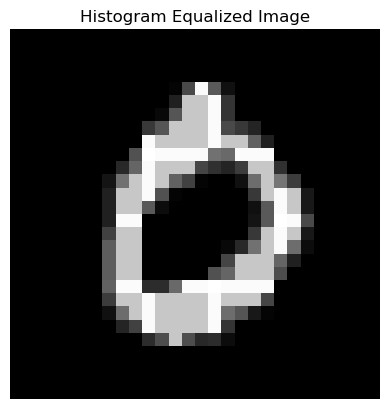

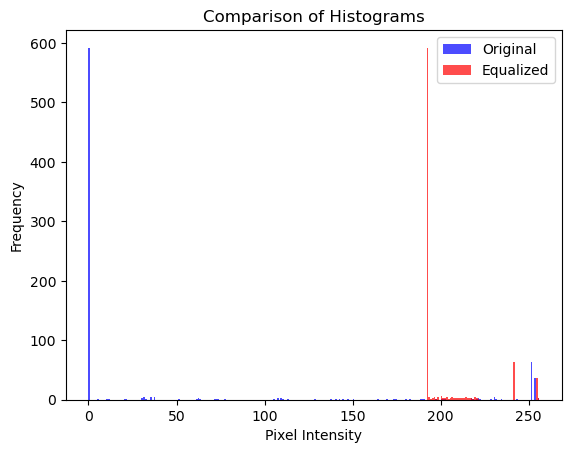

Observation:
After histogram equalization, the pixel intensities are redistributed to span a broader range, enhancing the contrast of the image.


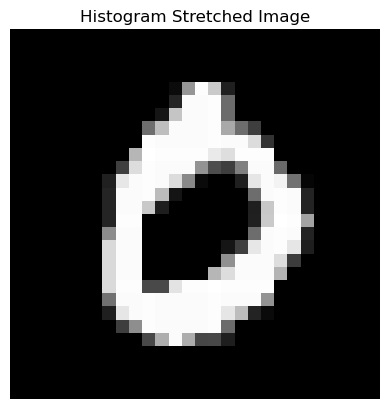

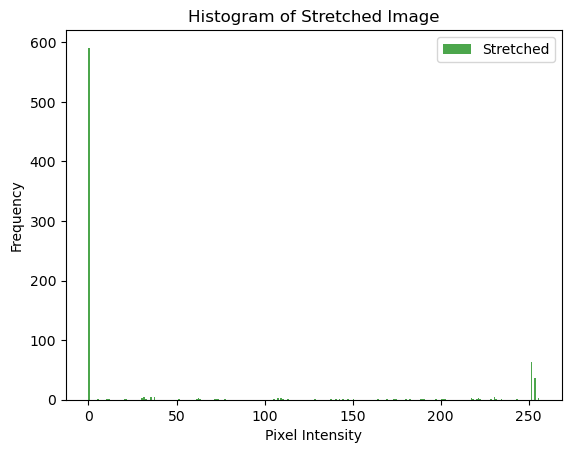

Observation:
Histogram stretching increases the dynamic range of pixel intensities to span 0-255, making the image contrast more noticeable without altering the overall shape of the histogram.


In [2]:
def histogram_equalization(image):
    image_array = np.array(image)
    flat = image_array.flatten()  # Flatten the image array
    hist, bins = np.histogram(flat, bins=256, range=[0, 256])
    cdf = hist.cumsum()  # Cumulative distribution function
    cdf_normalized = cdf * (255 / cdf[-1])  # Normalize CDF to [0, 255]
    equalized_image = cdf_normalized[flat].reshape(image_array.shape).astype(np.uint8)
    return Image.fromarray(equalized_image), hist, cdf_normalized

equalized_img, original_hist, equalized_cdf = histogram_equalization(random_img)

# Display the equalized image
plt.imshow(equalized_img, cmap="gray")
plt.title("Histogram Equalized Image")
plt.axis('off')
plt.show()

# Step 5: Show Histograms
# Original Histogram
plt.hist(np.array(random_img).flatten(), bins=256, range=[0, 256], color='blue', alpha=0.7, label="Original")
plt.hist(np.array(equalized_img).flatten(), bins=256, range=[0, 256], color='red', alpha=0.7, label="Equalized")
plt.title("Comparison of Histograms")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Step 6: Note Observations
print("Observation:")
print("After histogram equalization, the pixel intensities are redistributed to span a broader range, enhancing the contrast of the image.")

# Step 7: Perform Histogram Stretching
def histogram_stretching(image):
    image_array = np.array(image)
    min_val, max_val = np.min(image_array), np.max(image_array)
    stretched = ((image_array - min_val) / (max_val - min_val) * 255).astype(np.uint8)
    return Image.fromarray(stretched)

stretched_img = histogram_stretching(random_img)

# Display the stretched image
plt.imshow(stretched_img, cmap="gray")
plt.title("Histogram Stretched Image")
plt.axis('off')
plt.show()

# Display histogram of stretched image
plt.hist(np.array(stretched_img).flatten(), bins=256, range=[0, 256], color='green', alpha=0.7, label="Stretched")
plt.title("Histogram of Stretched Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Step 8: Observations on Stretching
print("Observation:")
print("Histogram stretching increases the dynamic range of pixel intensities to span 0-255, making the image contrast more noticeable without altering the overall shape of the histogram.")
